# <center>UNIVERSIDADE ESTADUAL DE CAMPINAS</center>
# <center>INSTITUTE OF COMPUTING</center>

## <center>Machine Learninng</center>
## <center>MC886A/MO444A</center>

- Luis Bernal Chahuayo (RA 234923)
- Jarol Butron Soria (RA 234833)

## K-means
### Load Datasets


In [3]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

df = pd.read_table("cluster.dat",header=None, sep="\s+")
datos = pd.DataFrame(df)
datos


,0,1
0,1555.0,28.65
1,1490.0,27.55
2,1445.0,28.35
3,1415.0,28.80
4,1375.0,28.05
...,...,...
568,3420.0,27.95
569,3465.0,26.85
570,3525.0,26.00
571,3570.0,26.15


- Transforming the dataset to an array


In [4]:
datos=datos.to_numpy()
datos

array([[1555.  ,   28.65],
       [1490.  ,   27.55],
       [1445.  ,   28.35],
       ...,
       [3525.  ,   26.  ],
       [3570.  ,   26.15],
       [3440.  ,   25.6 ]])

### Shuffle data

In [5]:
np.random.shuffle(datos)
datos

array([[3300.  ,   15.15],
       [1015.  ,   11.  ],
       [1740.  ,    6.5 ],
       ...,
       [ 630.  ,   19.1 ],
       [3540.  ,   24.7 ],
       [1230.  ,   28.4 ]])

## Split Dataset 
### Split data in training/test sets (90/10) 

In [6]:
datos_train = datos[:int(0.9*len(datos))]
datos_test = datos[int(0.9*len(datos)):]

x_train = datos_train[:,0]
y_train = datos_train[:,1]

x_test = datos_test[:,0]
y_test = datos_test[:,1]


## Pre-processing
### Normalization

In [7]:
def normalization(x,y,x_max,x_min,y_max,y_min):
    x=(x-x_min)/(x_max-x_min) 
    y=(y-y_min)/(y_max-y_min)
    return x,y

x_max_train = x_train.max()
x_min_train= x_train.min()
y_max_train = y_train.max()
y_min_train = y_train.min()

x_max_test = x_test.max()
x_min_test = x_test.min()
y_max_test = y_test.max()
y_min_test = y_test.min()

x_n_train, y_n_train = normalization(x_train,y_train,x_max_train,x_min_train,y_max_train,y_min_train)
x_n_test, y_n_test = normalization(x_test,y_test,x_max_test,x_min_test,y_max_test,y_min_test)

## Implementation k-means
### Distortion

$$
SSE=\sum_{i=1}^{m} {(y_i - \hat{y_i})}^{2}
$$

In [8]:
def Distortion(x,y,centroides_x,centroides_y):
    distortion = ( ( x - centroides_x )**2 + ( y - centroides_y )**2 ).sum()
    return distortion

In [9]:

def kmeans(k,x,y,x_min,x_max,y_min,y_max):
    # Find min and max values    
    x_min=np.min(x)
    x_max=np.max(x)
    y_min=np.min(y)
    y_max=np.max(y)
   
    # Select K Random Points
    punto_x=np.random.uniform(low=x_min,high=x_max,size=k)
    punto_y=np.random.uniform(low=y_min,high=y_max,size=k)
    
    old_distortion = np.inf 
    for it in range(20):
        # Se creará una matriz de distancias
        matriz_distancias = np.zeros((len(x),k))
    
        for k_i in range(k):
            # Cálculo de Distancia Euclideana
            x_h=(x-punto_x[k_i])**2
            y_h=(y-punto_y[k_i])**2
            dist= np.sqrt(x_h+y_h)
            matriz_distancias[:,k_i]=dist

        # Encontrar la mínima distancia y actualizar la pertenencia en la 
        # matriz máscara
        
        min=np.argmin(matriz_distancias,axis=1)
        matriz_clusters=np.zeros(matriz_distancias.shape)
        i=0
        for min_i in min:
            matriz_clusters[i][min_i]=1
            i+=1
        # Transformar en matriz columna para multiplicar
        x_r=x.reshape(-1,1)
        y_r=y.reshape(-1,1)

        # Calcular la suma de los valores clusters
        matriz_clusters_x=x_r*matriz_clusters
        matriz_clusters_y=y_r*matriz_clusters

        total=matriz_clusters.sum(axis=0)

        total_x=matriz_clusters_x.sum(axis=0)
        total_y=matriz_clusters_y.sum(axis=0)

        # Actualizar puntos con la media total_x
        punto_x=(total_x/ (total+0.0000000001) )
        punto_y=(total_y/ (total+0.0000000001) )

        # Lista de clusters ( 0, 1 , 2) Para colorear
        clusters = np.argmax(matriz_clusters,axis=1)
        
        centroides_x = np.matmul(matriz_clusters,punto_x)
        centroides_y = np.matmul(matriz_clusters,punto_y)
        
        distortion = Distortion(x,y,centroides_x,centroides_y)
        
        # Distortion No varía
        if ( abs( old_distortion - distortion ) <= 0.001 ): break
        else: old_distortion = distortion



    
    print ( "\n \n DISTORTION =",distortion, "ITERATION=", it)
    plt.scatter(x,y,marker="o",c=clusters)
    plt.scatter(punto_x,punto_y,marker="*",c="red")
    plt.show()

    return punto_x,punto_y,matriz_clusters,distortion


## Metrics to evaluate
### Root mean squared error standard deviation (RMSSTD)

$$
RMSSTD= \sqrt{\frac{{\sum_i}{\sum_{x{\in}c_i}}{{\parallel x-c_i\parallel}}^{2}}{p.{\sum_i (n_i - 1)}}}
$$


In [10]:
def RMSSTD(x,y,punto_x,punto_y,matriz_clusters,k):
    centroides_x = np.matmul(matriz_clusters,punto_x)
    centroides_y = np.matmul(matriz_clusters,punto_y)
    distortion = Distortion(x,y,centroides_x,centroides_y)
    number_attributes = 2 * ( len(x) - k )
    return np.sqrt(distortion/number_attributes)




 
 DISTORTION = 85.8097337395067 ITERATION= 1


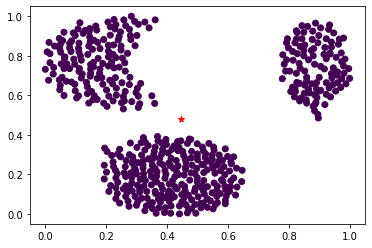


 
 DISTORTION = 51.51651234851744 ITERATION= 2


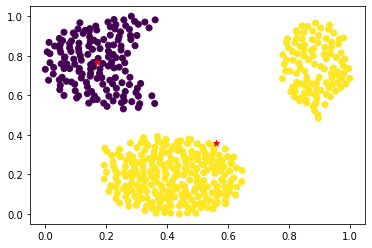


 
 DISTORTION = 11.51165122772326 ITERATION= 3


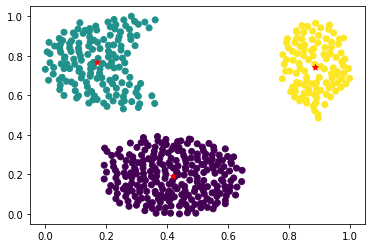


 
 DISTORTION = 9.103793426166888 ITERATION= 8


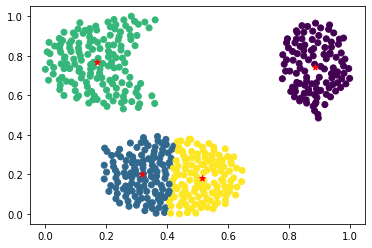


 
 DISTORTION = 7.819847076883022 ITERATION= 9


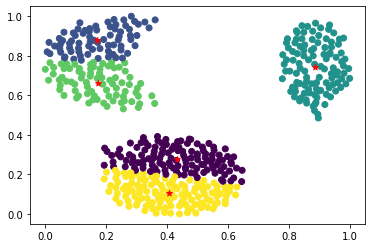


 
 DISTORTION = 6.1392789263467495 ITERATION= 10


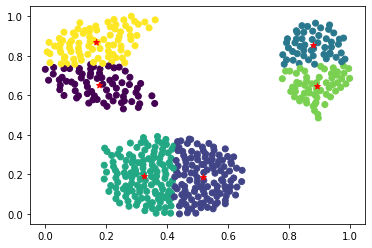


 
 DISTORTION = 5.4814864759292075 ITERATION= 13


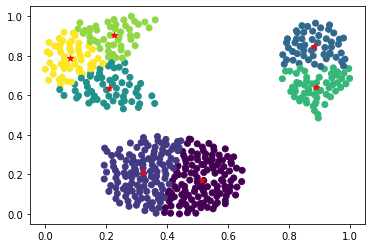


 
 DISTORTION = 4.266200173728046 ITERATION= 11


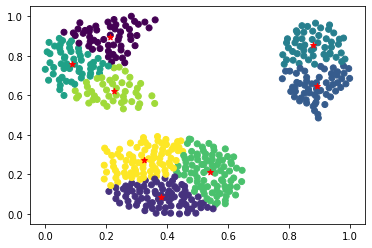


 
 DISTORTION = 4.2063887038280035 ITERATION= 11


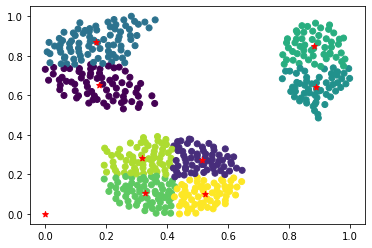


 
 DISTORTION = 4.6663280375970775 ITERATION= 13


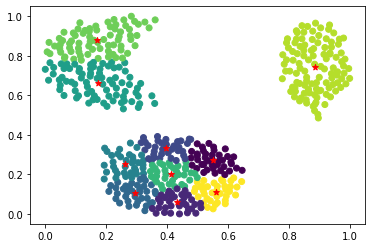

Disttortion


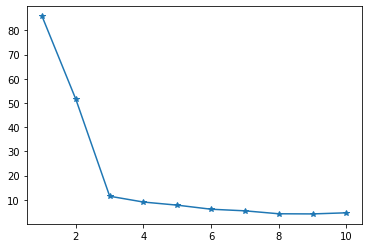

Root Mean Squared Standard Deviation


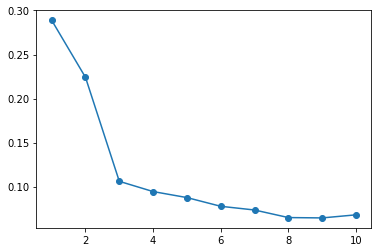

In [11]:
def metodo_codo(k_max):
    list_distortions = []
    list_rmmstds = []
    for k in range(1,k_max+1):
        centroide_x , centroide_y , matriz_clusters , distortion = kmeans(k,x_n_train,y_n_train,x_min_train,x_max_train,y_min_train,y_max_train)
        rmmstd = RMSSTD(x_n_train,y_n_train,centroide_x,centroide_y, matriz_clusters, k)
        list_distortions.append(distortion)
        list_rmmstds.append(rmmstd)
    
    print("Disttortion")
    plt.plot(range(1,k_max+1),list_distortions,marker="*")
    plt.show()

    print("Root Mean Squared Standard Deviation")
    plt.plot(range(1,k_max+1),list_rmmstds,marker="o")
    plt.show()



metodo_codo(10)

[1. 0. 0. 0. 0. 1. 1. 2. 0. 0. 2. 2. 0. 2. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1.
 1. 0. 2. 2. 1. 0. 2. 0. 0. 0. 2. 0. 1. 0. 2. 1. 1. 0. 0. 1. 0. 2. 2. 0.
 0. 1. 0. 0. 2. 0. 2. 0. 2. 0. 2. 0. 1. 1. 2. 0. 2. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 2. 0. 0. 2. 2. 0. 0. 0. 0. 0. 2. 2. 2. 2. 0. 1. 0. 0. 0. 2. 2.
 0. 1. 2. 1. 0. 1. 0. 0. 0. 2. 0. 2. 0. 0. 2. 2. 0. 0. 2. 0. 1. 2. 1. 0.
 2. 0. 0. 0. 1. 0. 1. 2. 2. 2. 1. 0. 0. 2. 1. 0. 1. 1. 0. 0. 2. 0. 1. 0.
 2. 2. 0. 1. 0. 1. 0. 0. 0. 2. 0. 0. 1. 0. 2. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 2. 2. 2. 0. 0. 0. 2. 0. 2. 2. 2. 1. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0.
 0. 2. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 2. 1. 2. 2. 2. 0. 2. 1. 0. 2. 2. 0. 2. 0. 2. 2. 2. 1. 2. 0. 0. 2. 1. 0.
 2. 0. 2. 2. 0. 1. 0. 0. 1. 2. 1. 2. 1. 0. 1. 0. 0. 0. 1. 0. 2. 1. 2. 1.
 2. 2. 1. 2. 1. 1. 0. 0. 1. 0. 2. 2. 2. 1. 2. 0. 0. 0. 2. 2. 0. 1. 0. 2.
 1. 0. 1. 0. 1. 1. 2. 0. 0. 2. 0. 1. 2. 2. 2. 0. 0. 0. 2. 2. 0. 0. 0. 1.
 1. 2. 1. 0. 0. 2. 2. 2. 0. 2. 0. 2. 0. 2. 1. 0. 0.

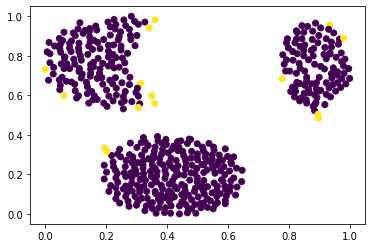

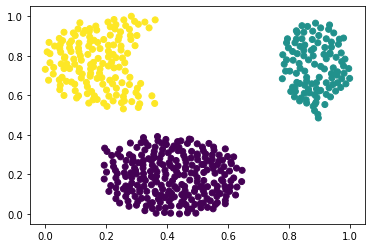

In [53]:
def dbscan(x,y, radio, M ):
    # P = escogemos un punto
    marcas = np.zeros( x.shape )
    # 0 No worked 
    # 1 Core Point
    # 2 Border
    # 3 Outlier

    while( True ):

        por_procesar = np.where( marcas == 0)
        
        if ( len ( por_procesar[0] ) == 0): break

        p_index = por_procesar[0][0] 
        punto_x = x[p_index]
        punto_y = y[p_index]

        # print( punto_x , punto_y)

        distancias = np.sqrt ( ( x - punto_x )**2 + ( y - punto_y )**2 )
        
        n_vecinos = len ( distancias[ distancias < radio ]  )
        if  n_vecinos >= M:
            marcas[p_index] = 1
        elif n_vecinos > 0 : 
            marcas[p_index] = 2
        else: 
            marcas[p_index] = 3

    
    
    clusters = -1 * np.ones ( marcas.shape )  # -1 , aun no se trabajo , # 0  ,... 
    visitados = np.zeros ( marcas.shape  , dtype=bool)


    core_points = np.where(marcas == 1)[0]

    n_cluster = 0
    while ( True ):
        
        #   1,  5 , 7

        #    0 , 1 , 2, 3 ,4 ,5 ,6 , 7  ( Clusters )
        #        1            2 

        #    0 , 1 , 2, 3 ,4 ,5 ,6 , 7  ( Visitados )
                 # 

        
        
        # No visitados y Que sean Clusters 
        

        if ( len(core_points) == 0 ) : break
        
        if  len(  np.where ( ( ~ visitados ) & ( clusters != -1  ) & ( marcas == 1 ) )[0]  ) == 0:
            
            c_p_x = x[core_points[0]]
            c_p_y = y[core_points[0]]

            visitados[ core_points[0] ] = 1 
            distancias = np.sqrt ( ( x - c_p_x )**2 + ( y - c_p_y )**2 )
            clusters[ np.where(distancias < radio)  ] = n_cluster 

            core_points = core_points[ 1 : ]
            n_cluster += 1 
            
        else: 
            core_points_nuevos = np.where ( ( ~ visitados ) & ( clusters != -1  ) & ( marcas == 1 ) )[0]      
            
            c_p_x = x[core_points_nuevos[0]]
            c_p_y = y[core_points_nuevos[0]]

            visitados[ core_points_nuevos[0] ] = 1 
            distancias = np.sqrt ( ( x - c_p_x )**2 + ( y - c_p_y )**2 )
            clusters[ np.where(distancias < radio)  ] = clusters[ core_points_nuevos[0] ]

            core_points = np.delete(core_points, np.where( core_points == core_points_nuevos[0] ))
    
    print ( clusters )


    plt.scatter(x,y,c=marcas)
    plt.show()

    plt.scatter(x,y,c=clusters)
    plt.show()

    
dbscan(x_n_train,y_n_train,0.07, 9 )

